#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [31]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/SalariesX.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011.0,NaN,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011.0,NaN,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011.0,NaN,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011.0,NaN,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011.0,NaN,San Francisco


In [32]:
# Print the list of column names
print(df.columns)


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency'],
      dtype='object')


In [33]:
# Display the number of rows and columns in the dataset
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Number of rows: 41180
Number of columns: 12

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                float64
Notes               float64
Agency               object
dtype: object

Missing values in each column:
Id                      0
EmployeeName            0
JobTitle                0
BasePay                 0
OvertimePay             0
OtherPay                0
Benefits            36160
TotalPay                1
TotalPayBenefits        1
Year                    1
Notes               41180
Agency                  1
dtype: int64


In [34]:
# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()[0]  # Note: Mode might return multiple values, so taking the first one
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

# Display the results
print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Mode Salary:", mode_salary)
print("Minimum Salary:", min_salary)
print("Maximum Salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of Salary:", std_dev_salary)


Mean Salary: 82538.13133004688
Median Salary: 75692.01
Mode Salary: 123290.7
Minimum Salary: 0.0
Maximum Salary: 567595.43
Salary Range: 567595.43
Standard Deviation of Salary: 54065.56808869933


In [35]:
#العمود  لديه عدد كبير من القيم المفقودة وليس حاسمًا لتحليل،
# حذف الأعمدة ذات القيم المفقودة الكبيرة
df_cleaned = df.drop(['Benefits', 'Notes'], axis=1)

# بالنسبة للأعمدة الرقمية، يمكننا تعويض القيم المفقودة بالمتوسط أو الوسيط للحفاظ على توزيع البيانات بشكل عام.


# تعويض القيم المفقودة في الأعمدة الرقمية بالمتوسط
df_cleaned['TotalPay'].fillna(df_cleaned['TotalPay'].mean(), inplace=True)
df_cleaned['TotalPayBenefits'].fillna(df_cleaned['TotalPayBenefits'].mean(), inplace=True)
df_cleaned['Year'].fillna(df_cleaned['Year'].median(), inplace=True)


# تعويض القيم المفقودة في العمود الفئوي بالوضع
df_cleaned['Agency'].fillna(df_cleaned['Agency'].mode()[0], inplace=True)


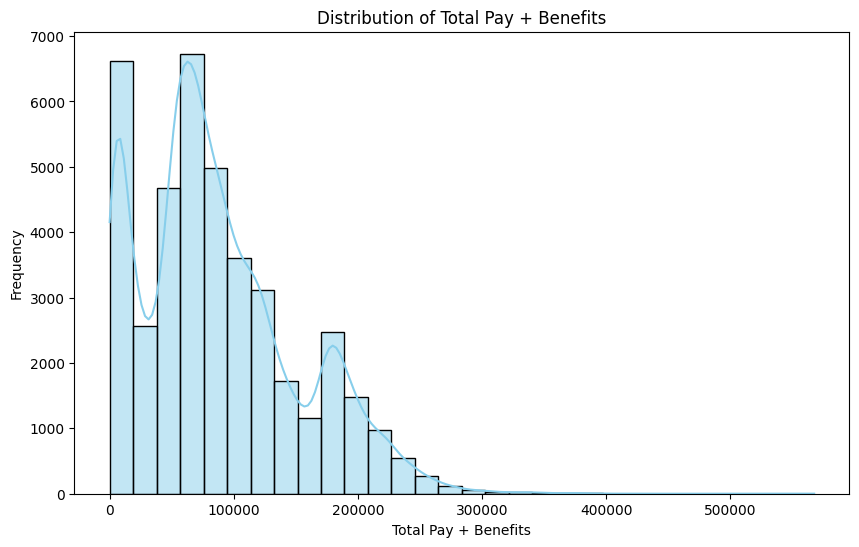

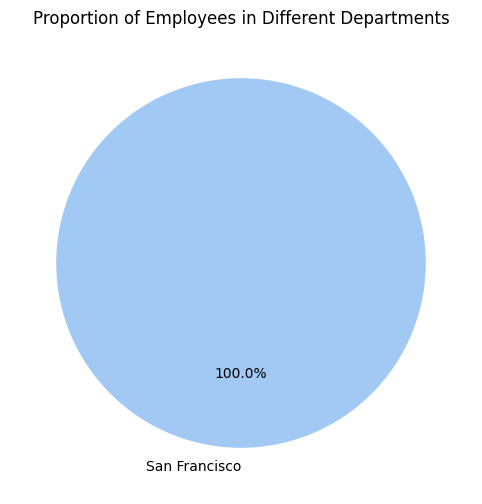

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for the distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPayBenefits'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Pay + Benefits')
plt.xlabel('Total Pay + Benefits')
plt.ylabel('Frequency')
plt.show()

# Pie chart for the proportion of employees in different departments
department_counts = df['Agency'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()


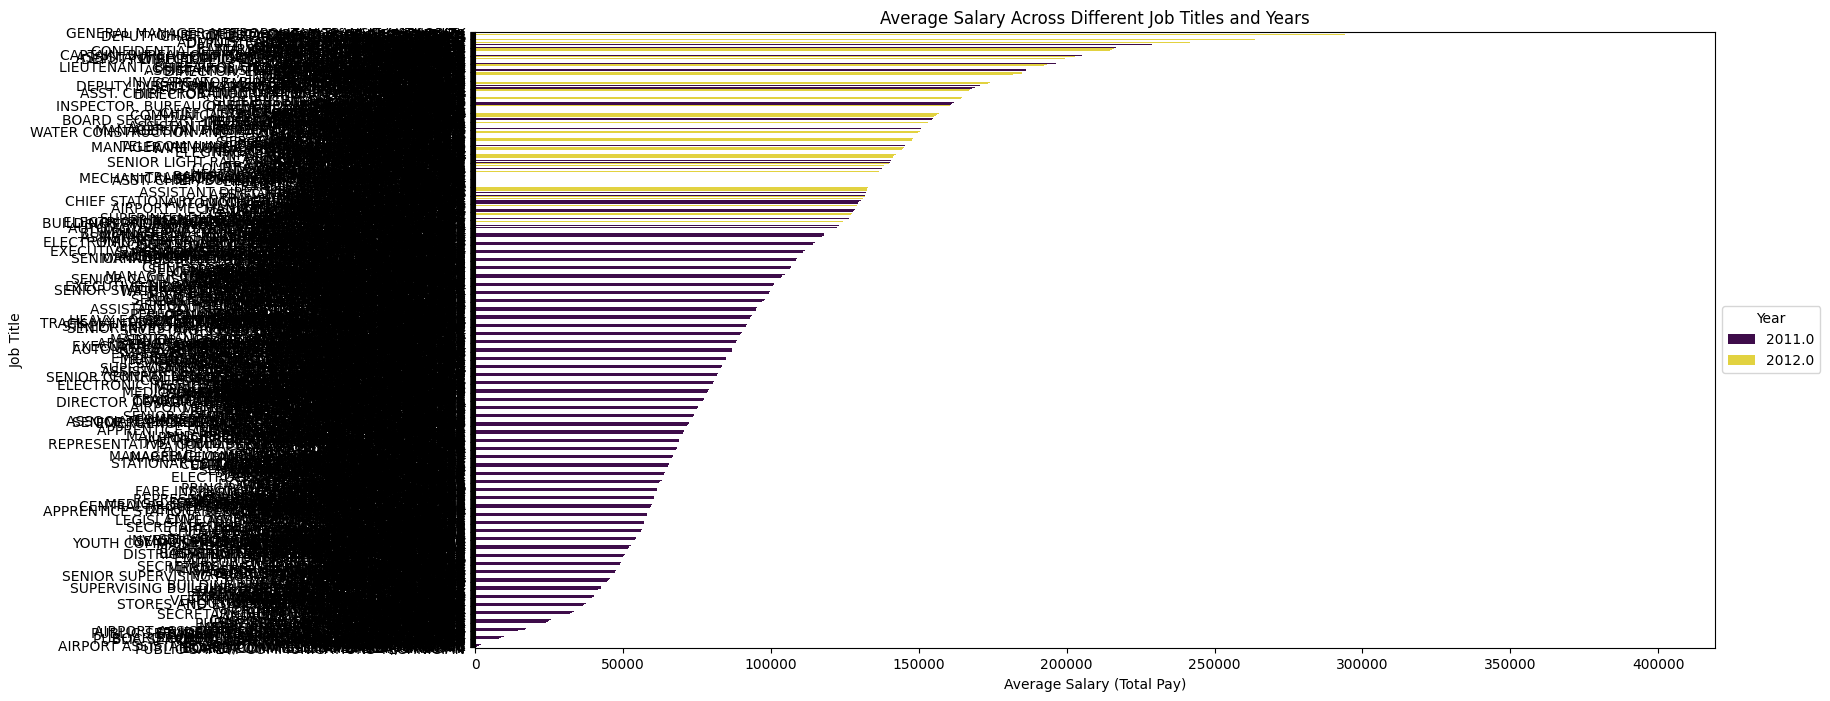

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'JobTitle' and 'Year' and calculate the average salary for each group
grouped_data = df.groupby(['JobTitle', 'Year'])['TotalPay'].mean().reset_index()

# Sort the data for better visualization
sorted_data = grouped_data.sort_values(by='TotalPay', ascending=False)

# Plotting a bar chart for average salaries across different job titles and years
plt.figure(figsize=(16, 8))
sns.barplot(x='TotalPay', y='JobTitle', hue='Year', data=sorted_data, palette='viridis', dodge=True)
plt.title('Average Salary Across Different Job Titles and Years')
plt.xlabel('Average Salary (Total Pay)')
plt.ylabel('Job Title')
plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Correlation Coefficient between TotalPay and OvertimePay: 0.5019631402824906


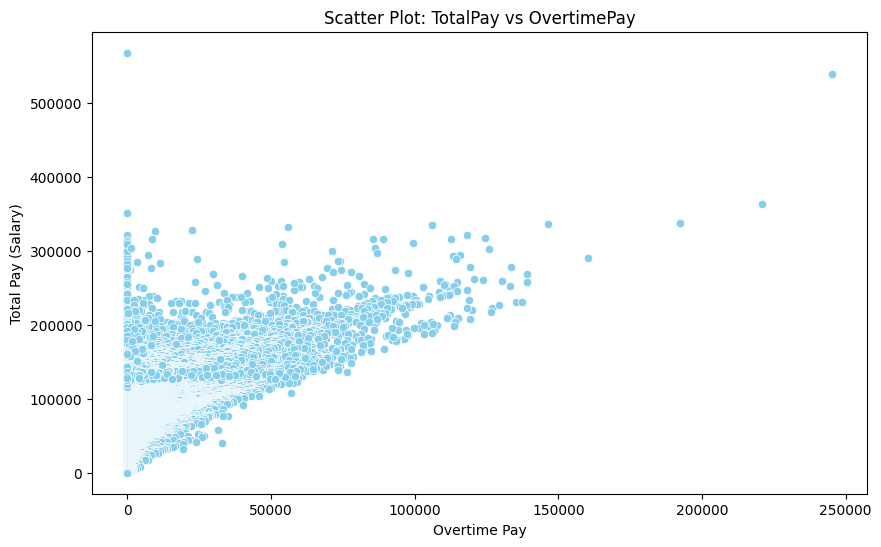

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation coefficient
correlation_coefficient = df['TotalPay'].corr(df['OvertimePay'])

# Print the correlation coefficient
print(f'Correlation Coefficient between TotalPay and OvertimePay: {correlation_coefficient}')

# Plotting a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OvertimePay', y='TotalPay', data=df, color='skyblue')
plt.title('Scatter Plot: TotalPay vs OvertimePay')
plt.xlabel('Overtime Pay')
plt.ylabel('Total Pay (Salary)')
plt.show()


# Good Luck!